In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ['PATH_TO_ENV'] = "~/projects/chatsky-llm-autoconfig/.env"

In [4]:
from dialogue2graph.datasets.complex_dialogues.generation import LoopedGraphGenerator
from three_stages_0 import ThreeStagesGraphGenerator
from three_stages_graph_generation import ThreeStagesGraphGenerator as GrouperGenerator

/data/home/peshkichev/projects/chatsky-llm-autoconfig/experiments/exp2025_03_12_topic_generation/exp2025_03_12_topic_generation/three_stages_graph_generation.py:22: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-m3", model_kwargs={"device": env_settings.DEVICE})
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


In [5]:
from dialogue2graph.pipelines.core.graph import Graph
from dialogue2graph.pipelines.core.dialogue_sampling import RecursiveDialogueSampler
from dialogue2graph.datasets.complex_dialogues.prompts import graph_example
from dialogue2graph.metrics.llm_metrics import compare_graphs
from dialogue2graph.metrics.no_llm_metrics import dg_triplets_match

In [6]:
from settings import EnvSettings
env_settings = EnvSettings()

In [7]:
from langchain.chat_models import ChatOpenAI

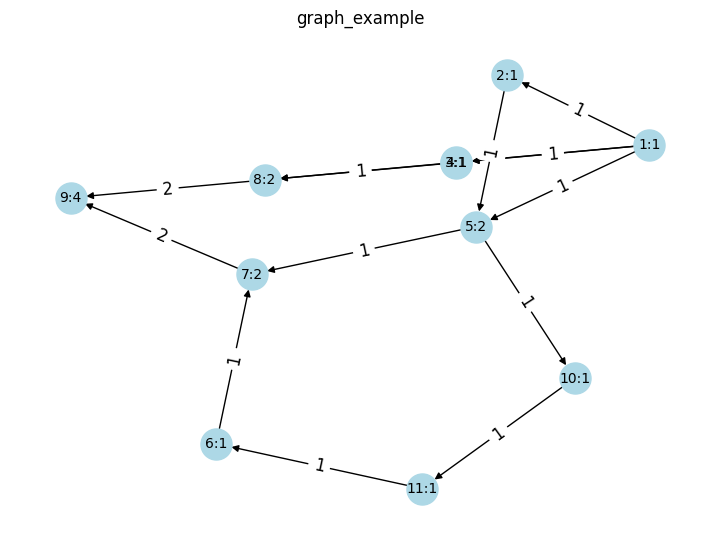

In [8]:
Graph(graph_example).visualise_short("graph_example")

In [ ]:
!conda install pygraphviz --y

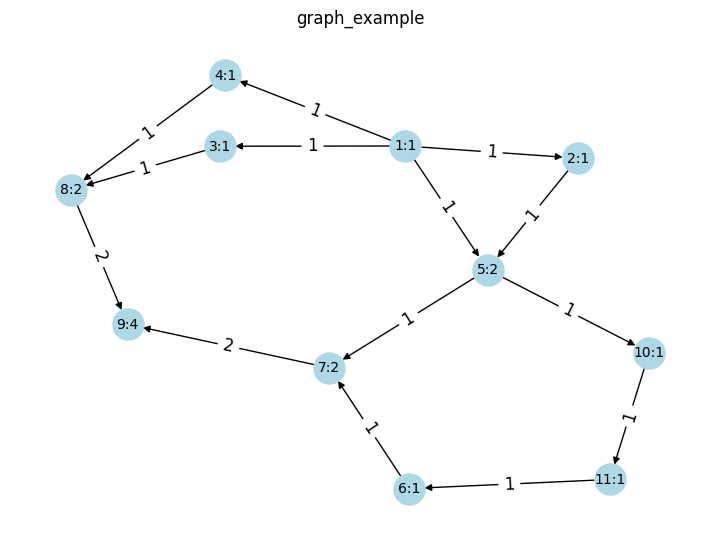

In [12]:
Graph(graph_example).visualise_short("graph_example")

In [13]:
graph_example['nodes']

[{'id': 1,
  'label': 'start',
  'is_start': True,
  'utterances': ['Hello! How can I help you?']},
 {'id': 2,
  'label': 'ask_price_range',
  'is_start': False,
  'utterances': ['There are a number of options for Indian restaurants in the centre of town. What price range would you like?']},
 {'id': 3,
  'label': 'ask_cuisine_preference',
  'is_start': False,
  'utterances': ['I found five expensive restaurants on the south side of town. Would you prefer Chinese, Indian, Italian or Mexican?']},
 {'id': 4,
  'label': 'ask_interest_in_options',
  'is_start': False,
  'utterances': ['I have found many possibilities. Golden house is chinese and the river bar steakhouse and grill serves modern european. Are either of those of interest for you?']},
 {'id': 5,
  'label': 'provide_recommendations',
  'is_start': False,
  'utterances': ['Try curry prince or pizza hut fen ditton',
   'I was able to find three options in your price range, may I recommend The Gandhi?']},
 {'id': 6,
  'label': 'ask

In [8]:
sampler = RecursiveDialogueSampler()

In [6]:
dias = sampler.invoke(Graph(graph_example),5)

ENDS:  [9]
NODES:  [[1, 2, 5, 10, 11, 6, 7, 9], [1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9], [1, 5, 7, 9]]
REM:  [[1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9]]
Graph has all the dialogues


In [10]:
generation_model = ChatOpenAI(model="chatgpt-4o-latest", api_key=env_settings.OPENAI_API_KEY, base_url=env_settings.OPENAI_BASE_URL, temperature=1)
theme_validation_model = ChatOpenAI(model="gpt-3.5-turbo", api_key=env_settings.OPENAI_API_KEY, base_url=env_settings.OPENAI_BASE_URL, temperature=0)
validation_model = ChatOpenAI(model="gpt-4o-mini", api_key=env_settings.OPENAI_API_KEY, base_url=env_settings.OPENAI_BASE_URL, temperature=0)

/tmp/ipykernel_3799268/4146588986.py:1: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  generation_model = ChatOpenAI(model="chatgpt-4o-latest", api_key=env_settings.OPENAI_API_KEY, base_url=env_settings.OPENAI_BASE_URL, temperature=1)


In [11]:
topic_generator = LoopedGraphGenerator(generation_model,validation_model, theme_validation_model)

In [ ]:
graph = topic_generator.invoke("booking a table")

INFO:dialogue2graph.datasets.complex_dialogues.generation:Generating Graph ...
INFO:dialogue2graph.utils.prompt_caching:Generated UUID: 00000000-0000-0000-0000-00000000002a



Generating graph for topic: booking a table


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:dialogue2graph.datasets.complex_dialogues.generation:Graph generated is {'edges': [{'source': 1, 'target': 2, 'utterances': ['Hi! I’d like to book a table.', 'Hello! I need to make a reservation.']}, {'source': 2, 'target': 3, 'utterances': ['I need a table for 4 at 7 PM.', 'Can I get a table for two at 8:30?']}, {'source': 3, 'target': 4, 'utterances': ['Yes, book it please.', 'Go ahead and confirm the reservation.']}, {'source': 3, 'target': 8, 'utterances': ['Actually, never mind. I don’t need to book.', 'On second thought, I’ll pass for now.']}, {'source': 4, 'target': 5, 'utterances': ['My name is Alex, and my number is 555-1234.', 'Sure! It’s Jamie, and my phone number is 987-6543.']}, {'source': 5, 'target': 7, 'utterances': ['Thanks! That’s all I needed.', 'No, that’s it. Thanks a lot!']}, {'source': 2, 'target': 6, 'utterances': ['Actually, can I change the 

ENDS:  [7, 8]
NODES:  [[1, 2, 3, 4, 6, 2, 6, 4, 5, 7], [1, 2, 6, 2, 3, 4, 6, 4, 5, 7], [1, 2, 6, 4, 6, 2, 3, 4, 5, 7], [1, 2, 3, 4, 6, 4, 5, 7], [1, 2, 6, 2, 3, 4, 5, 7], [1, 2, 6, 4, 6, 2, 3, 8], [1, 2, 3, 4, 5, 7], [1, 2, 6, 2, 3, 8], [1, 2, 6, 4, 5, 7], [1, 2, 3, 8]]
REM:  [[1, 2, 6, 4, 6, 2, 3, 8], [1, 2, 3, 4, 5, 7]]


INFO:dialogue2graph.datasets.complex_dialogues.generation:Sampled 60 dialogues


Graph has all the dialogues
Graph has all the dialogues


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:dialogue2graph.datasets.complex_dialogues.generation:Validating and fixing transitions...
INFO:dialogue2graph.datasets.complex_dialogues.generation:Validating initial graph
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx

Sampling dialogues...
ENDS:  [7, 8]
NODES:  [[1, 2, 3, 4, 6, 4, 5, 7], [1, 2, 3, 4, 5, 7], [1, 2, 6, 4, 5, 7], [1, 2, 3, 8]]
REM:  [[1, 2, 3, 4, 6, 4, 5, 7], [1, 2, 6, 4, 5, 7], [1, 2, 3, 8]]


INFO:dialogue2graph.datasets.complex_dialogues.generation:going to return: {'edges': [{'source': 1, 'target': 2, 'utterances': ['Hi! I’d like to book a table.', 'Hello! I need to make a reservation.']}, {'source': 2, 'target': 3, 'utterances': ['I need a table for 4 at 7 PM.', 'Can I get a table for two at 8:30?']}, {'source': 3, 'target': 4, 'utterances': ['Yes, book it please.', 'Go ahead and confirm the reservation.']}, {'source': 3, 'target': 8, 'utterances': ['Actually, never mind. I don’t need to book.', 'On second thought, I’ll pass for now.']}, {'source': 4, 'target': 5, 'utterances': ['My name is Alex, and my number is 555-1234.', 'Sure! It’s Jamie, and my phone number is 987-6543.']}, {'source': 5, 'target': 7, 'utterances': ['Thanks! That’s all I needed.', 'No, that’s it. Thanks a lot!']}, {'source': 2, 'target': 6, 'utterances': ['Actually, can I change the time?', 'Wait, I need to modify the number of guests.']}, {'source': 4, 'target': 6, 'utterances': ['Wait, I actually 

Graph has all the dialogues
Sampled 64 dialogues
Graph has all the dialogues


In [32]:
graph

[{'graph': {'edges': [{'source': 1,
     'target': 2,
     'utterances': ['Hi! I’d like to book a table.',
      'Hello! I need to make a reservation.']},
    {'source': 2,
     'target': 3,
     'utterances': ['I need a table for 4 at 7 PM.',
      'Can I get a table for two at 8:30?']},
    {'source': 3,
     'target': 4,
     'utterances': ['Yes, book it please.',
      'Go ahead and confirm the reservation.']},
    {'source': 3,
     'target': 8,
     'utterances': ['Actually, never mind. I don’t need to book.',
      'On second thought, I’ll pass for now.']},
    {'source': 4,
     'target': 5,
     'utterances': ['My name is Alex, and my number is 555-1234.',
      'Sure! It’s Jamie, and my phone number is 987-6543.']},
    {'source': 5,
     'target': 7,
     'utterances': ['Thanks! That’s all I needed.',
      'No, that’s it. Thanks a lot!']},
    {'source': 2,
     'target': 6,
     'utterances': ['Actually, can I change the time?',
      'Wait, I need to modify the number of 

In [78]:
graph[0]['graph']

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ['I’d like to book a table for dinner.',
    'Can you help me reserve a table at a restaurant?']},
  {'source': 2,
   'target': 3,
   'utterances': ['Tomorrow at 7 PM.', 'This Saturday at 8 PM.']},
  {'source': 3,
   'target': 4,
   'utterances': ['For four people.', 'A table for two, please.']},
  {'source': 4,
   'target': 8,
   'utterances': ['Somewhere in downtown would be nice.',
    'Anywhere with good Italian food.']},
  {'source': 8,
   'target': 9,
   'utterances': ["Let's go with Italian.", 'Chinese sounds good.']},
  {'source': 9,
   'target': 13,
   'utterances': ['Bella Italia sounds perfect.',
    'I’ll go with Lotus Garden.']},
  {'source': 13,
   'target': 5,
   'utterances': ['Yes, that works.', 'That sounds great.']},
  {'source': 5,
   'target': 10,
   'utterances': ['Yes, that’s correct.', 'Everything looks good.']},
  {'source': 5,
   'target': 6,
   'utterances': ['Actually, can we change the time to 9 PM?'

In [79]:
graph[0]['dialogues'][0]

{'messages': [{'text': 'Hey there! How can I help you today?',
   'participant': 'assistant'},
  {'text': 'I’d like to book a table for dinner.', 'participant': 'user'},
  {'text': 'Sure! What date and time would you like to book the table for?',
   'participant': 'assistant'},
  {'text': 'Tomorrow at 7 PM.', 'participant': 'user'},
  {'text': 'Got it. How many people will be joining?',
   'participant': 'assistant'},
  {'text': 'For four people.', 'participant': 'user'},
  {'text': 'Alright! Do you have a specific location in mind or any preferences?',
   'participant': 'assistant'},
  {'text': 'Somewhere in downtown would be nice.', 'participant': 'user'},
  {'text': 'There are a few great restaurants available. Would you like Italian, Chinese, or something else?',
   'participant': 'assistant'},
  {'text': "Let's go with Italian.", 'participant': 'user'},
  {'text': 'Sure! You could try Bella Italia for Italian, Lotus Garden for Chinese, or Grill House for a steakhouse experience. A

In [17]:
graph_c = Graph({'edges': [{'source': 1,
   'target': 2,
   'utterances': ['I’d like to book a table for dinner.',
    'Can you help me reserve a table at a restaurant?']},
  {'source': 2,
   'target': 3,
   'utterances': ['Tomorrow at 7 PM.', 'This Saturday at 8 PM.']},
  {'source': 3,
   'target': 4,
   'utterances': ['For four people.', 'A table for two, please.']},
  {'source': 4,
   'target': 8,
   'utterances': ['Somewhere in downtown would be nice.',
    'Anywhere with good Italian food.']},
  {'source': 8,
   'target': 9,
   'utterances': ["Let's go with Italian.", 'Chinese sounds good.']},
  {'source': 9,
   'target': 13,
   'utterances': ['Bella Italia sounds perfect.',
    'I’ll go with Lotus Garden.']},
  {'source': 13,
   'target': 5,
   'utterances': ['Yes, that works.', 'That sounds great.']},
  {'source': 5,
   'target': 10,
   'utterances': ['Yes, that’s correct.', 'Everything looks good.']},
  {'source': 5,
   'target': 6,
   'utterances': ['Actually, can we change the time to 9 PM?',
    "Let's do a different date instead."]},
  {'source': 5,
   'target': 7,
   'utterances': ['Wait, I need to change the number of people.',
    'Can we make it for six instead?']},
  {'source': 6,
   'target': 5,
   'utterances': ['Make it 9 PM instead.', "Let's go for Sunday at 7 PM."]},
  {'source': 7,
   'target': 5,
   'utterances': ["Now it's for three people.", "Actually, let's do five."]},
  {'source': 10,
   'target': 11,
   'utterances': ['Can I get their phone number and address?',
    'Do you have their contact info?']},
  {'source': 10,
   'target': 12,
   'utterances': ["Nope, that's all. Thanks!",
    'That’s all I needed. Have a great day!']},
  {'source': 11,
   'target': 12,
   'utterances': ["No, that's all. Thanks!",
    'I’m all set. Have a great day!']}],
 'nodes': [{'id': 1,
   'label': 'start',
   'is_start': True,
   'utterances': ['Hey there! How can I help you today?']},
  {'id': 2,
   'label': 'ask_date_time',
   'is_start': False,
   'utterances': ['Sure! What date and time would you like to book the table for?']},
  {'id': 3,
   'label': 'ask_party_size',
   'is_start': False,
   'utterances': ['Got it. How many people will be joining?']},
  {'id': 4,
   'label': 'ask_location',
   'is_start': False,
   'utterances': ['Alright! Do you have a specific location in mind or any preferences?']},
  {'id': 5,
   'label': 'confirm_details',
   'is_start': False,
   'utterances': ['Just to confirm, you need a table for {party_size} on {date_time}. Does that sound right?']},
  {'id': 6,
   'label': 'modification_date_time',
   'is_start': False,
   'utterances': ['Sure! What new date and time would you like instead?']},
  {'id': 7,
   'label': 'modification_party_size',
   'is_start': False,
   'utterances': ['Got it! How many people should I update it to?']},
  {'id': 8,
   'label': 'offer_options',
   'is_start': False,
   'utterances': ['There are a few great restaurants available. Would you like Italian, Chinese, or something else?']},
  {'id': 9,
   'label': 'provide_options',
   'is_start': False,
   'utterances': ['Sure! You could try Bella Italia for Italian, Lotus Garden for Chinese, or Grill House for a steakhouse experience. Any of these sound good?']},
  {'id': 10,
   'label': 'confirm_booking',
   'is_start': False,
   'utterances': ["Great, I've booked your table at {restaurant_name} for {party_size} on {date_time}. Anything else I can help with?"]},
  {'id': 11,
   'label': 'provide_contact_info',
   'is_start': False,
   'utterances': ['Bella Italia is located at 25 Main Street and you can call them at 555-1234.',
    'Grill House is on West Road, and they can be reached at 555-8765.',
    'Lotus Garden is at 78 East Avenue and their phone number is 555-5678.']},
  {'id': 12,
   'label': 'closing',
   'is_start': False,
   'utterances': ['Thanks for reaching out. Have a great day!',
    "You're all set! Enjoy your meal!",
    'Your reservation is confirmed. Hope you have a wonderful time!']},
  {'id': 13,
   'label': 'confirm_restaurant',
   'is_start': False,
   'utterances': ['Great choice! You’d like to book a table at {restaurant_name}, correct?']}]})

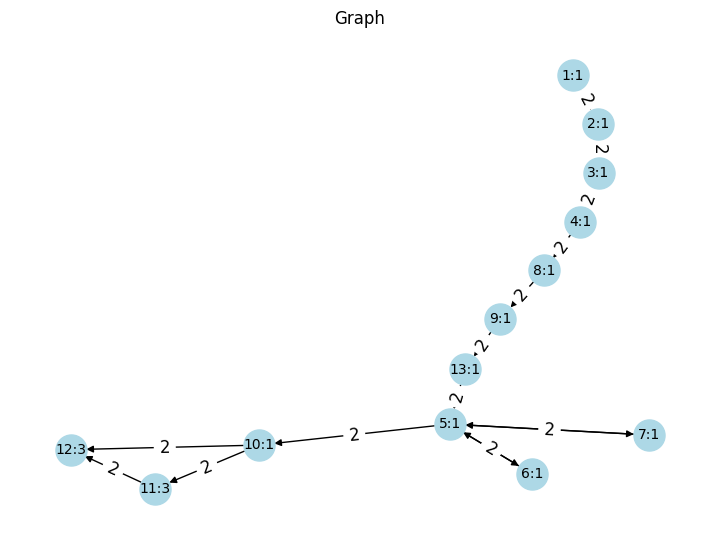

In [18]:
graph_c.visualise_short("Graph")

In [19]:
graph_c.graph_dict['nodes']

[{'id': 1,
  'label': 'start',
  'is_start': True,
  'utterances': ['Hey there! How can I help you today?']},
 {'id': 2,
  'label': 'ask_date_time',
  'is_start': False,
  'utterances': ['Sure! What date and time would you like to book the table for?']},
 {'id': 3,
  'label': 'ask_party_size',
  'is_start': False,
  'utterances': ['Got it. How many people will be joining?']},
 {'id': 4,
  'label': 'ask_location',
  'is_start': False,
  'utterances': ['Alright! Do you have a specific location in mind or any preferences?']},
 {'id': 5,
  'label': 'confirm_details',
  'is_start': False,
  'utterances': ['Just to confirm, you need a table for {party_size} on {date_time}. Does that sound right?']},
 {'id': 6,
  'label': 'modification_date_time',
  'is_start': False,
  'utterances': ['Sure! What new date and time would you like instead?']},
 {'id': 7,
  'label': 'modification_party_size',
  'is_start': False,
  'utterances': ['Got it! How many people should I update it to?']},
 {'id': 8,
  '

In [20]:
dias = sampler.invoke(graph_c,5)

ENDS:  [12]
NODES:  [[1, 2, 3, 4, 8, 9, 13, 5, 6, 5, 7, 5, 10, 11, 12], [1, 2, 3, 4, 8, 9, 13, 5, 7, 5, 6, 5, 10, 11, 12], [1, 2, 3, 4, 8, 9, 13, 5, 6, 5, 7, 5, 10, 12], [1, 2, 3, 4, 8, 9, 13, 5, 7, 5, 6, 5, 10, 12], [1, 2, 3, 4, 8, 9, 13, 5, 6, 5, 10, 11, 12], [1, 2, 3, 4, 8, 9, 13, 5, 7, 5, 10, 11, 12], [1, 2, 3, 4, 8, 9, 13, 5, 6, 5, 10, 12], [1, 2, 3, 4, 8, 9, 13, 5, 7, 5, 10, 12], [1, 2, 3, 4, 8, 9, 13, 5, 10, 11, 12], [1, 2, 3, 4, 8, 9, 13, 5, 10, 12]]
REM:  [[1, 2, 3, 4, 8, 9, 13, 5, 6, 5, 10, 12], [1, 2, 3, 4, 8, 9, 13, 5, 7, 5, 10, 12], [1, 2, 3, 4, 8, 9, 13, 5, 10, 11, 12]]
Graph has all the dialogues


In [39]:
generator = ThreeStagesGraphGenerator()

In [39]:
res_graph = generator.invoke(dias, temp=1)

LLM


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hey there! How can I help you today?']}, {'id': 2, 'label': 'ask_reservation_details', 'is_start': False, 'utterances': ['Of course! How many guests and what time do you need the reservation for?', 'Sure! What time and for how many people?']}, {'id': 3, 'label': 'confirm_availability', 'is_start': False, 'utterances': ['I can get you a table for that time. Would you like to confirm the booking?', 'That time is available! Should I go ahead and book it for you?']}, {'id': 4, 'label': 'ask_contact_details', 'is_start': False, 'utterances': ['Got it! Can I have your name and a contact number for the reservation?', 'Great! I just need your name and phone number to finalize the booking.']}, {'id': 5, 'label': 'ask_modification', 'is_start': False, 'utterances': ['No problem! What would you like to change?', 'Sure thing! What details do you want to modify?']}, {'id': 6, 'label': 'confirm_booking', 'is_start': Fal

In [23]:
res_graph = generator.invoke(dias, model_name="gpt-4o-2024-11-20", temp=0)

LLM


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
/data/home/peshkichev/projects/chatsky-llm-autoconfig/experiments/exp2025_03_12_topic_generation/exp2025_03_12_topic_generation/three_stages_0.py:76: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-m3", model_kwargs={"device": env_settings.DEVICE})
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hey there! How can I help you today?']}, {'id': 2, 'label': 'ask_date_time', 'is_start': False, 'utterances': ['Sure! What date and time would you like to book the table for?']}, {'id': 3, 'label': 'ask_party_size', 'is_start': False, 'utterances': ['Got it. How many people will be joining?']}, {'id': 4, 'label': 'ask_location_preferences', 'is_start': False, 'utterances': ['Alright! Do you have a specific location in mind or any preferences?']}, {'id': 5, 'label': 'ask_cuisine', 'is_start': False, 'utterances': ['There are a few great restaurants available. Would you like Italian, Chinese, or something else?']}, {'id': 6, 'label': 'suggest_restaurants', 'is_start': False, 'utterances': ['Sure! You could try Bella Italia for Italian, Lotus Garden for Chinese, or Grill House for a steakhouse experience. Any of these sound good?']}, {'id': 7, 'label': 'confirm_restaurant', 'is_start': False, 'utterances': ['

INFO:chromadb.telemetry.product.posthog:Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.


RESULT:  {'edges': [{'source': 8, 'target': None, 'utterances': ['yes, that’s correct.', 'everything looks good.']}, {'source': 10, 'target': None, 'utterances': ['yes, that’s correct.', 'everything looks good.']}, {'source': 7, 'target': 8, 'utterances': ['yes, that works.', 'that sounds great.']}, {'source': 6, 'target': 7, 'utterances': ['bella italia sounds perfect.', 'i’ll go with lotus garden.']}, {'source': 5, 'target': 6, 'utterances': ["let's go with italian.", 'chinese sounds good.']}, {'source': 4, 'target': 5, 'utterances': ['somewhere in downtown would be nice.', 'anywhere with good italian food.']}, {'source': 3, 'target': 4, 'utterances': ['for four people.', 'a table for two, please.']}, {'source': 2, 'target': 3, 'utterances': ['tomorrow at 7 pm.', 'this saturday at 8 pm.']}, {'source': 1, 'target': 2, 'utterances': ['i’d like to book a table for dinner.', 'can you help me reserve a table at a restaurant?']}, {'source': 9, 'target': 8, 'utterances': ['make it 9 pm inst

In [25]:
res_graph = generator.invoke(dias, model_name="gpt-4o", temp=0)

LLM


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hey there! How can I help you today?']}, {'id': 2, 'label': 'ask_date_time', 'is_start': False, 'utterances': ['Sure! What date and time would you like to book the table for?']}, {'id': 3, 'label': 'ask_party_size', 'is_start': False, 'utterances': ['Got it. How many people will be joining?']}, {'id': 4, 'label': 'ask_location_preferences', 'is_start': False, 'utterances': ['Alright! Do you have a specific location in mind or any preferences?']}, {'id': 5, 'label': 'ask_cuisine', 'is_start': False, 'utterances': ['There are a few great restaurants available. Would you like Italian, Chinese, or something else?']}, {'id': 6, 'label': 'suggest_restaurants', 'is_start': False, 'utterances': ['Sure! You could try Bella Italia for Italian, Lotus Garden for Chinese, or Grill House for a steakhouse experience. Any of these sound good?']}, {'id': 7, 'label': 'confirm_restaurant', 'is_start': False, 'utterances': ['

In [ ]:
res_graph = generator.invoke(dias, model_name="o1-mini", temp=1)

LLM


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! How can I help you?']}, {'id': 2, 'label': 'provide_initial_options', 'is_start': False, 'utterances': ['Try curry prince or pizza hut fen ditton', 'I was able to find three options in your price range, may I recommend The Gandhi?', 'There are a number of options for Indian restaurants in the centre of town. What price range would you like?', 'I have found many possibilities. Golden house is chinese and the river bar steakhouse and grill serves modern european. Are either of those of interest for you?', 'I was able to find three options in your price range, may I recommend The Gandhi?', 'I have found many possibilities. Golden house is chinese and the river bar steakhouse and grill serves modern european. Are either of those of interest for you?', 'I found five expensive restaurants on the south side of town. Would you prefer Chinese, Indian, Italian or Mexican?', 'I was able to find three options i

In [17]:
graph_example

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ["I'm looking for an Indian restaurant, preferably in the centre of town."]},
  {'source': 2,
   'target': 5,
   'utterances': ['I would prefer cheap restaurants.']},
  {'source': 5,
   'target': 7,
   'utterances': ['Sure please book a table there fore 7 people at 12:15 on saturday']},
  {'source': 1,
   'target': 5,
   'utterances': ['I am looking for a restaurant. The restaurant should be in the moderate price range and should be in the east']},
  {'source': 5,
   'target': 10,
   'utterances': ['The restaurant should serve italian food.']},
  {'source': 6,
   'target': 7,
   'utterances': ['I will have 5 people and we would like 12:15 if possible. Thanks.']},
  {'source': 7,
   'target': 9,
   'utterances': ["No that's all I needed. Thank you!",
    'Thanks for you help. I only need the restaurant reservation. Goodbye.']},
  {'source': 10,
   'target': 11,
   'utterances': ['What other restaurants in that area serve Italian 

In [86]:
res_graph.graph_dict

{'nodes': [{'id': 1,
   'label': 'start',
   'is_start': True,
   'utterances': ['Hey there! How can I help you today?']},
  {'id': 2,
   'label': 'ask_date_time',
   'is_start': False,
   'utterances': ['Sure! What date and time would you like to book the table for?']},
  {'id': 3,
   'label': 'ask_party_size',
   'is_start': False,
   'utterances': ['Got it. How many people will be joining?']},
  {'id': 4,
   'label': 'ask_location',
   'is_start': False,
   'utterances': ['Alright! Do you have a specific location in mind or any preferences?']},
  {'id': 5,
   'label': 'ask_cuisine',
   'is_start': False,
   'utterances': ['There are a few great restaurants available. Would you like Italian, Chinese, or something else?']},
  {'id': 6,
   'label': 'suggest_restaurants',
   'is_start': False,
   'utterances': ['Sure! You could try Bella Italia for Italian, Lotus Garden for Chinese, or Grill House for a steakhouse experience. Any of these sound good?']},
  {'id': 7,
   'label': 'confirm

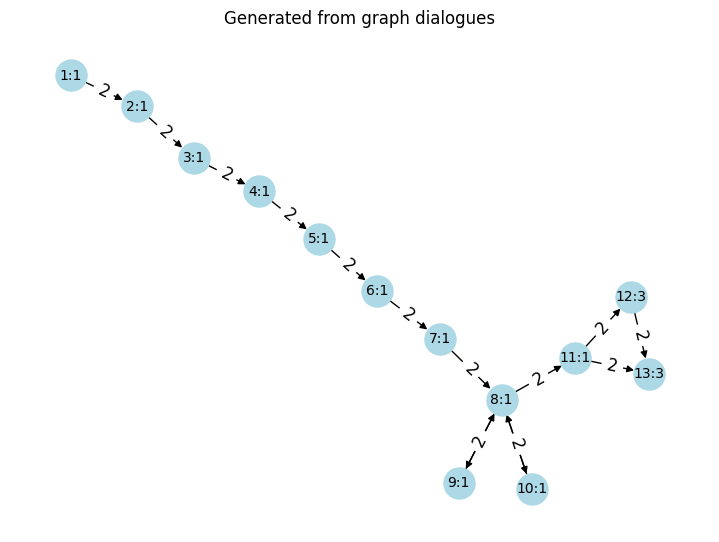

In [26]:
res_graph.visualise_short("Generated from graph dialogues")

In [28]:
compare_graphs(res_graph,graph_c)

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

{'value': True,
 'description': 'Nodes similarity: 0.9999997615814209, Nodes+edges similarity: 0.9678074717521667'}

In [48]:
grouper_generator = GrouperGenerator()

In [36]:
res_graph = grouper_generator.invoke(dias, model_name="gpt-4o", temp=0)

LISTS_N:  [(0, ['I’d like to book a table for dinner.', 'Can you help me reserve a table at a restaurant?']), (1, ['Tomorrow at 7 PM.', 'This Saturday at 8 PM.']), (2, ['For four people.', 'A table for two, please.']), (3, ['Somewhere in downtown would be nice.', 'Anywhere with good Italian food.']), (4, ["Let's go with Italian.", 'Chinese sounds good.']), (5, ['Bella Italia sounds perfect.', 'I’ll go with Lotus Garden.']), (6, ['Yes, that works.', 'That sounds great.']), (7, ['Actually, can we change the time to 9 PM?', 'Yes, that’s correct.', 'Everything looks good.', "Let's do a different date instead.", 'Wait, I need to change the number of people.', 'Can we make it for six instead?']), (8, ['Make it 9 PM instead.', "Let's go for Sunday at 7 PM."]), (9, ["Nope, that's all. Thanks!", 'That’s all I needed. Have a great day!', 'Can I get their phone number and address?', 'Do you have their contact info?']), (10, ['']), (11, ['']), (12, ['']), (13, ["Now it's for three people.", "Actua

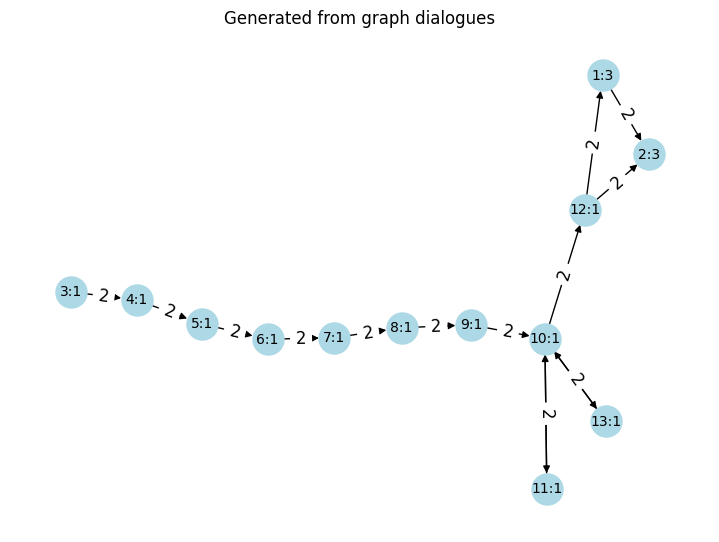

In [37]:
res_graph.visualise_short("Generated from graph dialogues")

In [38]:
compare_graphs(res_graph,graph_c)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

{'value': True,
 'description': 'Nodes similarity: 0.9853424429893494, Nodes+edges similarity: 0.9678074717521667'}

In [32]:
generation_model = ChatOpenAI(model="o1-mini", api_key=env_settings.OPENAI_API_KEY, base_url=env_settings.OPENAI_BASE_URL, temperature=1)
theme_validation_model = ChatOpenAI(model="gpt-3.5-turbo", api_key=env_settings.OPENAI_API_KEY, base_url=env_settings.OPENAI_BASE_URL, temperature=0)
validation_model = ChatOpenAI(model="gpt-3.5-turbo", api_key=env_settings.OPENAI_API_KEY, base_url=env_settings.OPENAI_BASE_URL, temperature=0)
topic_generator = LoopedGraphGenerator(generation_model,validation_model, theme_validation_model)

In [33]:
graph = topic_generator.invoke("booking a cruise package")

INFO:dialogue2graph.datasets.complex_dialogues.generation:Generating Graph ...
INFO:dialogue2graph.utils.prompt_caching:Generated UUID: 00000000-0000-0000-0000-00000000002a



Generating graph for topic: booking a cruise package


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:dialogue2graph.datasets.complex_dialogues.generation:Graph generated is {'edges': [{'source': 1, 'target': 2, 'utterances': ['Hi, I’d like to book a cruise package.', 'Hello, I want to book a cruise.']}, {'source': 2, 'target': 3, 'utterances': ["I'm interested in a Mediterranean cruise."]}, {'source': 2, 'target': 10, 'utterances': ["Actually, I'd like to go to Alaska instead."]}, {'source': 3, 'target': 4, 'utterances': ['Next month.', "I'd like to sail in June."]}, {'source': 3, 'target': 11, 'utterances': ['Nevermind, I need to think about it.', "I'm not ready to book right now."]}, {'source': 4, 'target': 5, 'utterances': ["It'll be two adults and one child.", 'Two adults and one child.']}, {'source': 4, 'target': 12, 'utterances': ["Actually, it's three adults."]}, {'source': 5, 'target': 6, 'utterances': ["I'm open to suggestions.", "I'd like some recommendati

Graph has all the dialogues
Graph has all the dialogues


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:dialogue2graph.datasets.complex_dialogues.generation:Validating and fixing transitions...
INFO:dialogue2graph.datasets.complex_dialogues.generation:Validating initial graph
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx

Sampling dialogues...


INFO:dialogue2graph.datasets.complex_dialogues.generation:going to return: {'edges': [{'source': 1, 'target': 2, 'utterances': ['Hi, I’d like to book a cruise package.', 'Hello, I want to book a cruise.']}, {'source': 2, 'target': 3, 'utterances': ["I'm interested in a Mediterranean cruise."]}, {'source': 2, 'target': 10, 'utterances': ["Actually, I'd like to go to Alaska instead."]}, {'source': 3, 'target': 4, 'utterances': ['Next month.', "I'd like to sail in June."]}, {'source': 3, 'target': 11, 'utterances': ['Nevermind, I need to think about it.', "I'm not ready to book right now."]}, {'source': 4, 'target': 5, 'utterances': ["It'll be two adults and one child.", 'Two adults and one child.']}, {'source': 4, 'target': 12, 'utterances': ["Actually, it's three adults."]}, {'source': 5, 'target': 6, 'utterances': ["I'm open to suggestions.", "I'd like some recommendations."]}, {'source': 5, 'target': 11, 'utterances': ['I changed my mind, cancel booking.', 'I need to cancel my booking

Graph has all the dialogues
Sampled 100 dialogues
Graph has all the dialogues


In [35]:
graph[0]['graph']['nodes']

[{'id': 1,
  'label': 'start',
  'is_start': True,
  'utterances': ['Hello! How can I help you today?']},
 {'id': 2,
  'label': 'ask_destination',
  'is_start': False,
  'utterances': ["Sure, I'd be happy to help you book a cruise. Where would you like to go?"]},
 {'id': 3,
  'label': 'ask_dates',
  'is_start': False,
  'utterances': ['Great choice! When are you planning to set sail?',
   'When would you like your cruise to depart?']},
 {'id': 4,
  'label': 'ask_passengers',
  'is_start': False,
  'utterances': ['How many passengers will be traveling with you?',
   'How many people are included in your booking?']},
 {'id': 5,
  'label': 'ask_cruise_preferences',
  'is_start': False,
  'utterances': ['Are you open to suggestions on cruise lines?',
   'Do you have a preferred cruise line or would you like some suggestions?']},
 {'id': 6,
  'label': 'provide_cruise_options',
  'is_start': False,
  'utterances': ['I recommend Royal Caribbean or MSC Cruises. Would you like more details on t

In [36]:
graph[0]['graph']['edges']

[{'source': 1,
  'target': 2,
  'utterances': ['Hi, I’d like to book a cruise package.',
   'Hello, I want to book a cruise.']},
 {'source': 2,
  'target': 3,
  'utterances': ["I'm interested in a Mediterranean cruise."]},
 {'source': 2,
  'target': 10,
  'utterances': ["Actually, I'd like to go to Alaska instead."]},
 {'source': 3,
  'target': 4,
  'utterances': ['Next month.', "I'd like to sail in June."]},
 {'source': 3,
  'target': 11,
  'utterances': ['Nevermind, I need to think about it.',
   "I'm not ready to book right now."]},
 {'source': 4,
  'target': 5,
  'utterances': ["It'll be two adults and one child.",
   'Two adults and one child.']},
 {'source': 4, 'target': 12, 'utterances': ["Actually, it's three adults."]},
 {'source': 5,
  'target': 6,
  'utterances': ["I'm open to suggestions.",
   "I'd like some recommendations."]},
 {'source': 5,
  'target': 11,
  'utterances': ['I changed my mind, cancel booking.',
   'I need to cancel my booking.']},
 {'source': 6,
  'target

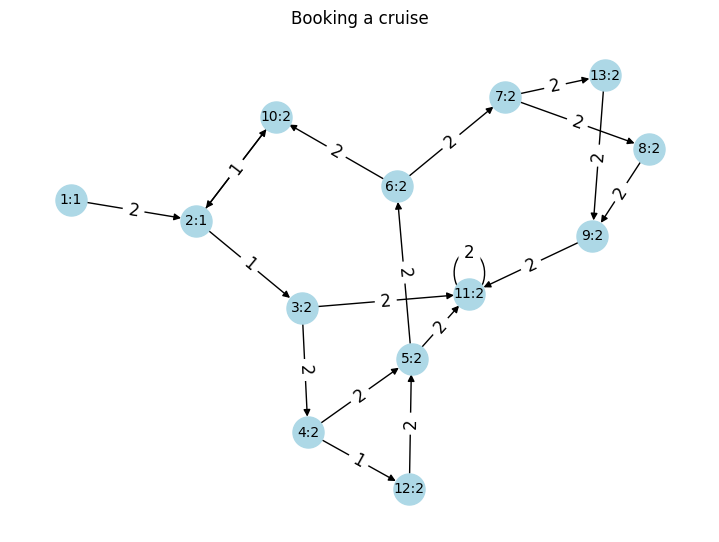

In [34]:
Graph(graph[0]['graph']).visualise_short("Booking a cruise")

In [38]:
dias = sampler.invoke(Graph(graph[0]['graph']),5)

Graph has all the dialogues


In [44]:
res_graph = generator.invoke(dias)

LLM


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! How can I help you today?']}, {'id': 2, 'label': 'ask_destination', 'is_start': False, 'utterances': ["Sure, I'd be happy to help you book a cruise. Where would you like to go?"]}, {'id': 3, 'label': 'ask_departure_date', 'is_start': False, 'utterances': ['Great choice! When are you planning to set sail?', 'When would you like your cruise to depart?']}, {'id': 4, 'label': 'ask_passenger_count', 'is_start': False, 'utterances': ['How many passengers will be traveling with you?', 'How many people are included in your booking?']}, {'id': 5, 'label': 'ask_cruise_line_preference', 'is_start': False, 'utterances': ['Are you open to suggestions on cruise lines?', 'Do you have a preferred cruise line or would you like some suggestions?']}, {'id': 6, 'label': 'suggest_cruise_lines', 'is_start': False, 'utterances': ['I recommend Royal Caribbean or MSC Cruises. Would you like more details on these?', 'We have

/data/home/peshkichev/projects/chatsky-llm-autoconfig/experiments/exp2025_03_12_topic_generation/exp2025_03_12_topic_generation/vectors.py:47: UserWarning: Relevance scores must be between 0 and 1, got [(Document(id='6', metadata={'id': 6}, page_content='sure! what type of cabin are you interested in?'), 0.5348666633373489), (Document(id='7', metadata={'id': 7}, page_content='alright, booking a suite cabin on norwegian cruise line for your cruise next month for three people. confirm?'), 0.40157898294243544), (Document(id='4', metadata={'id': 4}, page_content='are you open to suggestions on cruise lines?'), 0.2833036306654658), (Document(id='5', metadata={'id': 5}, page_content='i recommend royal caribbean or msc cruises. would you like more details on these?'), 0.2571288361599572), (Document(id='2', metadata={'id': 2}, page_content='great choice! when are you planning to set sail?'), 0.2513611242349384), (Document(id='1', metadata={'id': 1}, page_content="sure, i'd be happy to help you

RESULT:  {'edges': [{'source': 2, 'target': 3, 'utterances': ["i'm interested in a mediterranean cruise."]}, {'source': 10, 'target': 11, 'utterances': ["no thanks, that's all.", 'nothing else, thank you.']}, {'source': 8, 'target': 10, 'utterances': ['suite cabins, please.', "i'd like a suite."]}, {'source': 7, 'target': 8, 'utterances': ['i want a suite instead.', 'actually, a suite cabin would be better.']}, {'source': 6, 'target': 7, 'utterances': ['can you give me more details on royal caribbean?', 'tell me more about msc cruises.']}, {'source': 5, 'target': 6, 'utterances': ["i'm open to suggestions.", "i'd like some recommendations."]}, {'source': 4, 'target': 5, 'utterances': ["it'll be two adults and one child.", 'two adults and one child.']}, {'source': 3, 'target': 4, 'utterances': ['next month.', "i'd like to sail in june."]}, {'source': 1, 'target': 2, 'utterances': ['hi, i’d like to book a cruise package.', 'hello, i want to book a cruise.']}, {'source': 12, 'target': 2, 

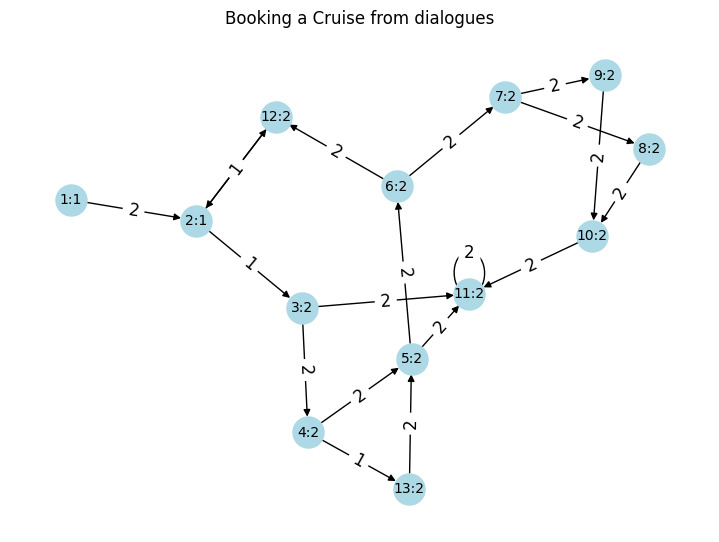

In [46]:
res_graph.visualise_short("Booking a Cruise from dialogues")

In [45]:
compare_graphs(res_graph,Graph(graph[0]['graph']))

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

{'value': True,
 'description': 'Nodes similarity: 0.9999999403953552, Nodes+edges similarity: 0.9651491045951843'}

In [49]:
res_graph = grouper_generator.invoke(dias, model_name="gpt-4o", temp=0)

LISTS_N:  [(0, ['Hi, I’d like to book a cruise package.', 'Hello, I want to book a cruise.']), (1, ["I'm interested in a Mediterranean cruise.", "Actually, I'd like to go to Alaska instead."]), (2, ['Next month.', "I'd like to sail in June.", 'Nevermind, I need to think about it.', "I'm not ready to book right now."]), (3, ["It'll be two adults and one child.", 'Two adults and one child.', "Actually, it's three adults."]), (4, ["I'm open to suggestions.", "I'd like some recommendations.", 'I changed my mind, cancel booking.', 'I need to cancel my booking.']), (5, ['Can you give me more details on Royal Caribbean?', 'Tell me more about MSC Cruises.', 'Tell me about Norwegian Cruise Line instead.', "I'd like to consider Carnival."]), (6, ['I want a suite instead.', 'Actually, a suite cabin would be better.', "I'd like a balcony cabin.", 'A balcony cabin, please.']), (7, ['Suite cabins, please.', "I'd like a suite."]), (8, ["No thanks, that's all.", 'Nothing else, thank you.']), (9, ['', 

/data/home/peshkichev/projects/chatsky-llm-autoconfig/experiments/exp2025_03_12_topic_generation/exp2025_03_12_topic_generation/vectors.py:47: UserWarning: Relevance scores must be between 0 and 1, got [(Document(id='6', metadata={'id': 6}, page_content='sure! what type of cabin are you interested in?'), 0.5348666633373489), (Document(id='7', metadata={'id': 7}, page_content='alright, booking a suite cabin on norwegian cruise line for your cruise next month for three people. confirm?'), 0.40157898294243544), (Document(id='4', metadata={'id': 4}, page_content='are you open to suggestions on cruise lines?'), 0.2833036306654658), (Document(id='5', metadata={'id': 5}, page_content='i recommend royal caribbean or msc cruises. would you like more details on these?'), 0.2571288361599572), (Document(id='2', metadata={'id': 2}, page_content='great choice! when are you planning to set sail?'), 0.2513611242349384), (Document(id='1', metadata={'id': 1}, page_content="sure, i'd be happy to help you

RESULT:  {'edges': [{'source': 13, 'target': 11, 'utterances': ["i'm interested in a mediterranean cruise."]}, {'source': 5, 'target': 4, 'utterances': ["no thanks, that's all.", 'nothing else, thank you.']}, {'source': 6, 'target': 5, 'utterances': ['suite cabins, please.', "i'd like a suite."]}, {'source': 7, 'target': 6, 'utterances': ['i want a suite instead.', 'actually, a suite cabin would be better.']}, {'source': 8, 'target': 7, 'utterances': ['can you give me more details on royal caribbean?', 'tell me more about msc cruises.']}, {'source': 9, 'target': 8, 'utterances': ["i'm open to suggestions.", "i'd like some recommendations."]}, {'source': 10, 'target': 9, 'utterances': ["it'll be two adults and one child.", 'two adults and one child.']}, {'source': 11, 'target': 10, 'utterances': ['next month.', "i'd like to sail in june."]}, {'source': 12, 'target': 13, 'utterances': ['hi, i’d like to book a cruise package.', 'hello, i want to book a cruise.']}, {'source': 3, 'target': 

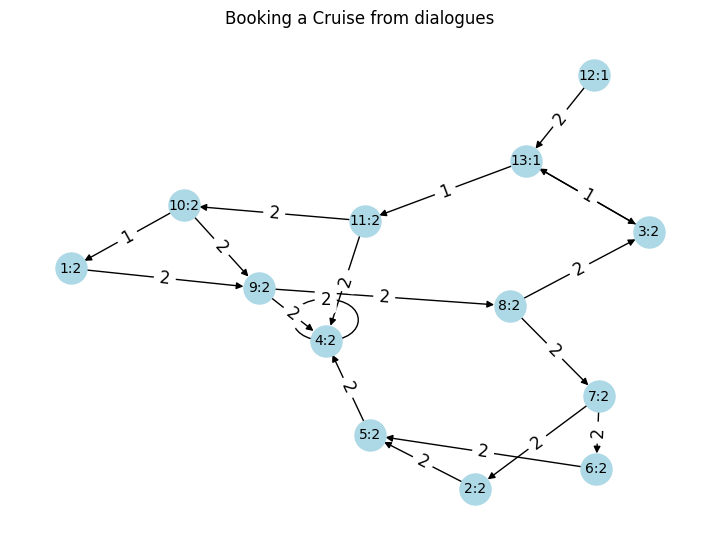

In [50]:
res_graph.visualise_short("Booking a Cruise from dialogues")

In [51]:
compare_graphs(res_graph,Graph(graph[0]['graph']))

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

{'value': True,
 'description': 'Nodes similarity: 0.9702073335647583, Nodes+edges similarity: 0.9651491045951843'}

In [55]:
graph = topic_generator.invoke("passport renewal application")

INFO:dialogue2graph.datasets.complex_dialogues.generation:Generating Graph ...
INFO:dialogue2graph.utils.prompt_caching:Generated UUID: 00000000-0000-0000-0000-00000000002a



Generating graph for topic: passport renewal application


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:dialogue2graph.datasets.complex_dialogues.generation:Graph generated is {'edges': [{'source': 1, 'target': 2, 'utterances': ['I need to renew my passport.', "I'd like to renew my passport."]}, {'source': 2, 'target': 3, 'utterances': ["I'd like to renew it online.", 'I want to renew it online.']}, {'source': 2, 'target': 7, 'utterances': ['Actually, I want to renew it in person.', "Change my mind, I'd prefer to renew in person."]}, {'source': 3, 'target': 4, 'utterances': ['Yes, please help me with the form.', 'Sure, I need assistance with the form.']}, {'source': 3, 'target': 7, 'utterances': ["Actually, I've changed my mind. I want to renew in person.", 'Nevermind, I want to handle it in person instead.']}, {'source': 4, 'target': 5, 'utterances': ["Thank you, I've got the link."]}, {'source': 5, 'target': 6, 'utterances': ["No, that's all. Thanks!"]}, {'source': 7

ENDS:  [6, 11]
NODES:  [[1, 2, 3, 7, 2, 7, 8, 9, 10, 6], [1, 2, 7, 2, 3, 7, 8, 9, 10, 6], [1, 2, 3, 7, 8, 9, 10, 6], [1, 2, 7, 2, 3, 4, 5, 6], [1, 2, 7, 8, 9, 10, 6], [1, 2, 3, 4, 5, 6], [1, 2, 3, 7, 2, 11], [1, 2, 7, 2, 11], [1, 2, 11]]
REM:  [[1, 2, 7, 8, 9, 10, 6], [1, 2, 3, 4, 5, 6], [1, 2, 3, 7, 2, 11]]
Graph has all the dialogues
Graph has all the dialogues


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:dialogue2graph.datasets.complex_dialogues.generation:Validating and fixing transitions...
INFO:dialogue2graph.datasets.complex_dialogues.generation:Validating initial graph
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx

Sampling dialogues...
ENDS:  [6, 11]
NODES:  [[1, 2, 7, 3, 7, 8, 9, 10, 6], [1, 2, 3, 7, 3, 4, 5, 6], [1, 2, 3, 7, 8, 9, 10, 6], [1, 2, 7, 3, 4, 5, 6], [1, 2, 7, 8, 9, 10, 6], [1, 2, 3, 4, 5, 6], [1, 2, 11]]
REM:  [[1, 2, 3, 7, 8, 9, 10, 6], [1, 2, 7, 3, 4, 5, 6], [1, 2, 11]]
Graph has all the dialogues
Sampled 27 dialogues
Graph has all the dialogues


In [57]:
graph

[{'graph': {'edges': [{'source': 1,
     'target': 2,
     'utterances': ['I need to renew my passport.',
      "I'd like to renew my passport."]},
    {'source': 2,
     'target': 3,
     'utterances': ["I'd like to renew it online.",
      'I want to renew it online.']},
    {'source': 2,
     'target': 7,
     'utterances': ['Actually, I want to renew it in person.',
      "Change my mind, I'd prefer to renew in person."]},
    {'source': 3,
     'target': 4,
     'utterances': ['Yes, please help me with the form.',
      'Sure, I need assistance with the form.']},
    {'source': 3,
     'target': 7,
     'utterances': ["Actually, I've changed my mind. I want to renew in person.",
      'Nevermind, I want to handle it in person instead.']},
    {'source': 4,
     'target': 5,
     'utterances': ["Thank you, I've got the link."]},
    {'source': 5, 'target': 6, 'utterances': ["No, that's all. Thanks!"]},
    {'source': 7,
     'target': 8,
     'utterances': ['Yes, please give me the

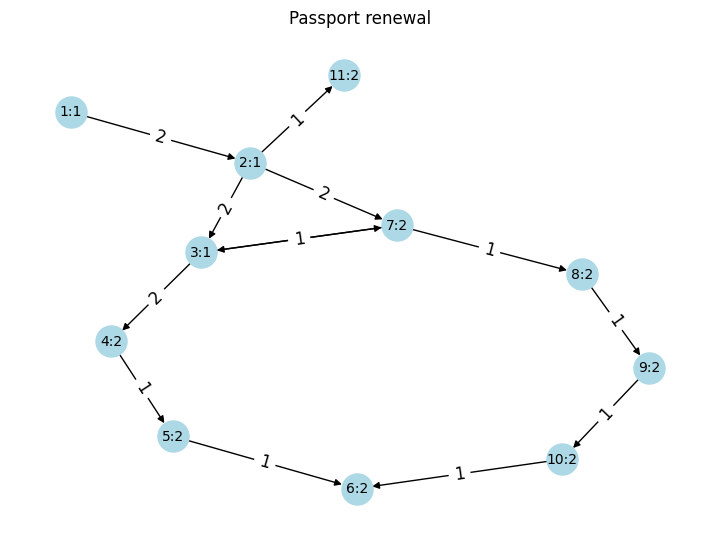

In [56]:
Graph(graph[0]['graph']).visualise_short('Passport renewal')

In [58]:
graph[0]['graph']['nodes']

[{'id': 1,
  'label': 'start',
  'is_start': True,
  'utterances': ['Hi there! How can I assist you today?']},
 {'id': 2,
  'label': 'ask_renew_method',
  'is_start': False,
  'utterances': ['Sure, I can help you renew your passport. Would you like to do it online or in person?']},
 {'id': 3,
  'label': 'ask_form_assistance',
  'is_start': False,
  'utterances': ["Great! You'll need to fill out the renewal form and submit a new photo. Do you need help with the form?"]},
 {'id': 4,
  'label': 'provide_form_link',
  'is_start': False,
  'utterances': ['Of course! You can find the renewal form on our website. Would you like me to send you the link?',
   "Sure thing! I'll send the renewal form link to your email. Do you want me to do that?"]},
 {'id': 5,
  'label': 'confirm_submit',
  'is_start': False,
  'utterances': ["I've sent the link to your email. Once you've filled it out, you can submit it along with your photo. Do you need anything else?",
   "The link is on its way to your inbox

In [59]:
dias = sampler.invoke(Graph(graph[0]['graph']),5)

ENDS:  [6, 11]
NODES:  [[1, 2, 7, 3, 7, 8, 9, 10, 6], [1, 2, 3, 7, 3, 4, 5, 6], [1, 2, 3, 7, 8, 9, 10, 6], [1, 2, 7, 3, 4, 5, 6], [1, 2, 7, 8, 9, 10, 6], [1, 2, 3, 4, 5, 6], [1, 2, 11]]
REM:  [[1, 2, 3, 7, 8, 9, 10, 6], [1, 2, 7, 3, 4, 5, 6], [1, 2, 11]]
Graph has all the dialogues


In [60]:
res_graph = grouper_generator.invoke(dias, model_name="gpt-4o", temp=0)

LISTS_N:  [(0, ['I need to renew my passport.', "I'd like to renew my passport."]), (1, ["I'd like to renew it online.", 'I want to renew it online.', 'Actually, I want to renew it in person.', "Change my mind, I'd prefer to renew in person.", "Actually, I don't need to renew my passport anymore."]), (2, ["Actually, I've changed my mind. I want to renew in person.", 'Nevermind, I want to handle it in person instead.', 'Yes, please help me with the form.', 'Sure, I need assistance with the form.']), (3, ['Yes, please give me the office address.', "Actually, I'd like to renew online instead."]), (4, ["I'd like to make an appointment."]), (5, ["Sure, let's schedule it for tomorrow at 10 AM."]), (6, ['Perfect, thank you.']), (7, ['']), (8, ['']), (9, ['Perfect, thank you.']), (10, ["Sure, let's schedule it for tomorrow at 10 AM."]), (11, ["I'd like to make an appointment."]), (12, ['Yes, please give me the office address.', "Actually, I'd like to renew online instead."]), (13, ["Thank you,

In [61]:
compare_graphs(res_graph,Graph(graph[0]['graph']))

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

{'value': True,
 'description': 'Nodes similarity: 0.9790757894515991, Nodes+edges similarity: 0.9754803776741028'}

In [21]:
dg_triplets_match(Graph(graph_c), dias)

Graph has all the dialogues


{'value': True}

In [17]:
dias = sampler.invoke(Graph(graph_example),5)

ENDS:  [9]
NODES:  [[1, 2, 5, 10, 11, 6, 7, 9], [1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9], [1, 5, 7, 9]]
REM:  [[1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9]]
Graph has all the dialogues


In [19]:
dg_triplets_match(Graph(graph_c), dias)

{'value': False,
 'description': 'Triplets missing in dialogues',
 'absent_triplets': [{'source': "here's the restaurant's info: 32 main street, 555-6789. need anything else?",
   'edge': "no, that's all i needed. thanks!",
   'target': 'alright, have a great meal!'},
  {'source': "here's the restaurant's info: 32 main street, 555-6789. need anything else?",
   'edge': "no, that's all i needed. thanks!",
   'target': 'thanks for reaching out. have a great day!'},
  {'source': 'no problem! what would you like to change about the reservation?',
   'edge': 'can we do 6:30 instead of 7?',
   'target': 'got it. how many people will it be, and what time are you thinking?'},
  {'source': 'hey there! how can i help you today?',
   'edge': 'nevermind, i changed my mind.',
   'target': 'thanks for reaching out. have a great day!'},
  {'source': 'hey there! how can i help you today?',
   'edge': 'nevermind, i changed my mind.',
   'target': 'alright, have a great meal!'},
  {'source': "you're all

In [22]:
from dialogue2graph.metrics.no_llm_metrics import dialogues_are_valid_paths

In [23]:
dialogues_are_valid_paths(Graph(graph_c), dias)

{'value': True}

In [24]:
dias = sampler.invoke(Graph(graph_example),5)

ENDS:  [9]
NODES:  [[1, 2, 5, 10, 11, 6, 7, 9], [1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9], [1, 5, 7, 9]]
REM:  [[1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9]]
Graph has all the dialogues


In [25]:
dialogues_are_valid_paths(Graph(graph_c), dias)

{'value': False,
 'invalid_transitions': [{'from_message': 'Hello! How can I help you?',
   'to_message': 'I am looking for a restaurant. The restaurant should be in the moderate price range and should be in the east',
   'dialogue_id': ''},
  {'from_message': 'I am looking for a restaurant. The restaurant should be in the moderate price range and should be in the east',
   'to_message': 'Try curry prince or pizza hut fen ditton',
   'dialogue_id': ''},
  {'from_message': 'Try curry prince or pizza hut fen ditton',
   'to_message': 'The restaurant should serve italian food.',
   'dialogue_id': ''},
  {'from_message': 'The restaurant should serve italian food.',
   'to_message': 'Pizza hut fen ditton serves italian food in the east, would you like a reservation?',
   'dialogue_id': ''},
  {'from_message': 'Pizza hut fen ditton serves italian food in the east, would you like a reservation?',
   'to_message': 'What other restaurants in that area serve Italian food?',
   'dialogue_id': ''}